In [1]:
# https://youtu.be/6IGx7ZZdS74?si=gJBLiMFiRZbzHUY9

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
pclass1 = (train_df['Pclass'] == 1).sum()
pclass2 = (train_df['Pclass'] == 2).sum()
pclass3 = (train_df['Pclass'] == 3).sum()

print(pclass1)
print(pclass2)
print(pclass3)

print(pclass1 + pclass2 + pclass3)
# 1st class - upper deck (expensive), 2nd class - middle deck, third class - lower decker (cheap)

216
184
491
891


In [10]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [14]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [15]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [16]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [17]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 9: 'Large', 10: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [18]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [19]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


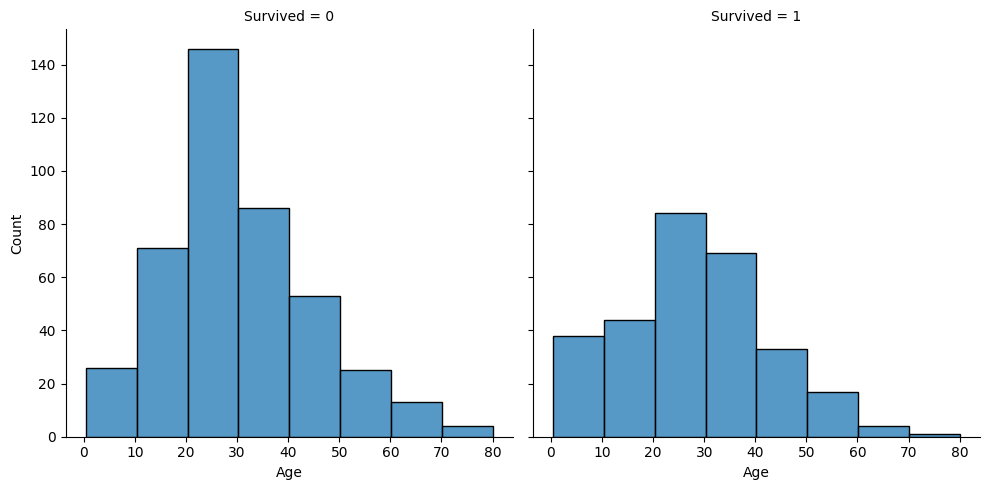

In [20]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [21]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [22]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\FusRada\AppData\Local\Temp\ipykernel_10236\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [23]:
# change age column into categorized numbers
train_df.loc[(train_df['Age'] <= 16), 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125 ), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24 ), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28 ), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312 ), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38 ), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47 ), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80 ), 'Age'] = 7

In [24]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3.0,0,0,211536,13.0000,NaN,S,1,Alone,"(24.0, 28.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S,1,Alone,"(16.0, 20.125]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Small,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,3.0,0,0,111369,30.0000,C148,C,1,Alone,"(24.0, 28.0]"


In [25]:
test_df.loc[(test_df['Age'] <= 16), 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125 ), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24 ), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28 ), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312 ), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38 ), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47 ), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80 ), 'Age'] = 7

In [26]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,7.8292,NaN,Q,1,Alone,"(32.0, 39.0]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,7.0000,NaN,S,2,Small,"(39.0, 48.0]"
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,9.6875,NaN,Q,1,Alone,"(48.0, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,8.6625,NaN,S,1,Alone,"(24.0, 27.0]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,3,Small,"(21.0, 24.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Alone,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,6.0,0,0,PC 17758,108.9000,C105,C,1,Alone,"(32.0, 39.0]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,6.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Alone,"(32.0, 39.0]"
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Alone,NaN


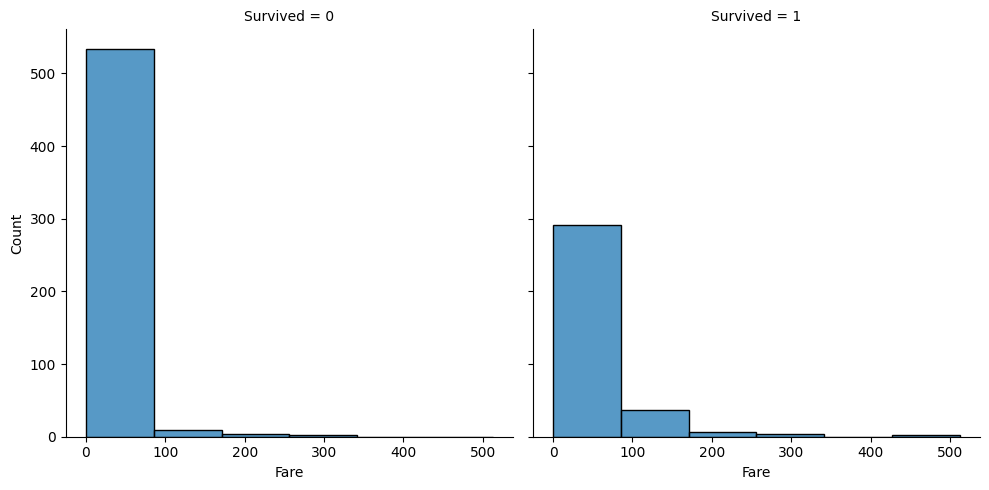

In [27]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [28]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [29]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\FusRada\AppData\Local\Temp\ipykernel_10236\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [30]:
# change fare col into categorized numbers
train_df.loc[(train_df['Fare'] <= 7.225), 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.225) & (train_df['Fare'] <= 7.896 ), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 7.896) & (train_df['Fare'] <= 10.5 ), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 10.5) & (train_df['Fare'] <= 23.0 ), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 23.0) & (train_df['Fare'] <= 51.862 ), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 51.862) & (train_df['Fare'] <= 512.329 ), 'Fare'] = 5

test_df.loc[(test_df['Fare'] <= 7.225), 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.225) & (test_df['Fare'] <= 7.896 ), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 7.896) & (test_df['Fare'] <= 10.5 ), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 10.5) & (test_df['Fare'] <= 23.0 ), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 23.0) & (test_df['Fare'] <= 51.862 ), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 51.862) & (test_df['Fare'] <= 512.329 ), 'Fare'] = 5

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,1.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,2.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,2.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,1.0,NaN,Q,1,Alone,"(32.0, 39.0]","(7.758, 8.662]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,0.0,NaN,S,2,Small,"(39.0, 48.0]","(-0.001, 7.758]"
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,2.0,NaN,Q,1,Alone,"(48.0, 76.0]","(8.662, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,2.0,NaN,S,1,Alone,"(24.0, 27.0]","(7.758, 8.662]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,3.0,NaN,S,3,Small,"(21.0, 24.0]","(8.662, 14.454]"


In [33]:
train_df['Title'] = train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0]
test_df['Title'] = test_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0]

In [34]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [35]:
#military - Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmarried female - Mile, Ms, Mme

train_df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [39]:
train_df['Title'] = train_df['Title'].replace({
    ' Capt': 'Military',
    ' Col': 'Military',
    ' Major': 'Military',

    ' Jonkheer': 'Noble',
    ' the Countess': 'Noble',
    ' Don': 'Noble',
    ' Lady': 'Noble',
    ' Sir': 'Noble',

    ' Mile': 'Noble',
    ' Ms': 'Noble',
    ' Mme': 'Noble',
})

test_df['Title'] = test_df['Title'].replace({
    ' Capt': 'Military',
    ' Col': 'Military',
    ' Major': 'Military',

    ' Jonkheer': 'Noble',
    ' the Countess': 'Noble',
    ' Don': 'Noble',
    ' Lady': 'Noble',
    ' Sir': 'Noble',

    ' Mile': 'Noble',
    ' Ms': 'Noble',
    ' Mme': 'Noble',
})

train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Miss,182,0.697802
3,Mlle,2,1.000000
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Rev,6,0.000000
7,Military,5,0.400000
8,Noble,7,0.714286
